In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Building an image classifier

In [ ]:
keras.__version__

'2.7.0'

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


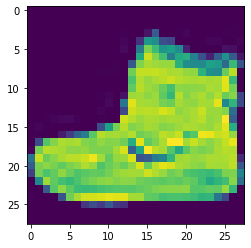

In [ ]:
plt.imshow(X_train_full[0])

In [ ]:
y_train_full[0]

9

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train_full[1]]

'T-shirt/top'

In [ ]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

## Data normalization

In [ ]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

#### Splitting data
* Training data - used for training the model
* Validation data - used for tuning the hyperparameters and evaluate the models
* Test data - used to test the model after the model has gone through initial vetting by the validation set.

In [ ]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Building the neural network
[28*28 pixel] > [Input layer (ReLu Activation)] > [Hidden layer 1] > [Hidden layer 2] > [Output layer (Softmax Activation)] > [10 categories] 

In [ ]:
# Setting random seeds to 42
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


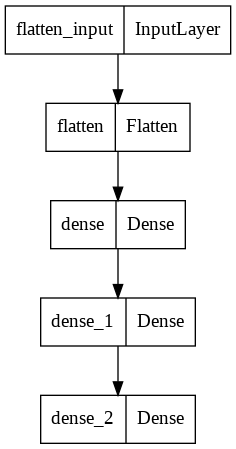

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
# accesing the parameters
weights, biases = model.layers[1].get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

### Documentaion

https://keras.io/guides/sequential_model/

In [ ]:
# Using back propagation algorithm "sgd"
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs = 30,
                          validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy

In [ ]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

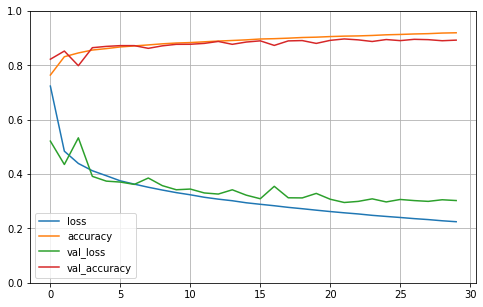

In [ ]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# evaliating the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3366 - accuracy: 0.8820


[0.3366333842277527, 0.8820000290870667]

In [ ]:
X_new = X_test[:3]

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


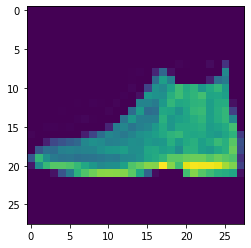

In [ ]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


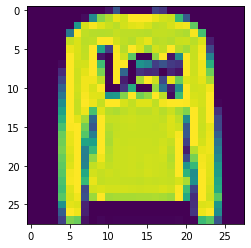

In [ ]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


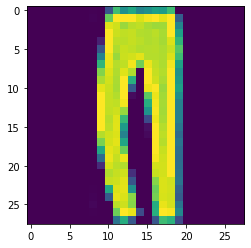

In [ ]:
print(plt.imshow(X_test[2]))


# ANN - To predict house prices

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

* 20640 records
* 8 numeric, predictive attributes and the target
    * Medinc median income in block
    * HouseAge median house age in block
    * AveRooms average number of rooms
    * Population block population
    * AveOccup average house occupation
    * Latitude house block latitude
    * Longitude house block longitude

  The target variable is the median house value in units of 100,000 for California districts.

In [ ]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
model = keras.models.Sequential([
     keras.layers.Dense(30, activation="relu", input_shape=[8]),
     keras.layers.Dense(30, activation="relu"),
     keras.layers.Dense(1)                            
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 4s 8ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 3s 9ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 2s 7ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3942 - mae: 0.4502


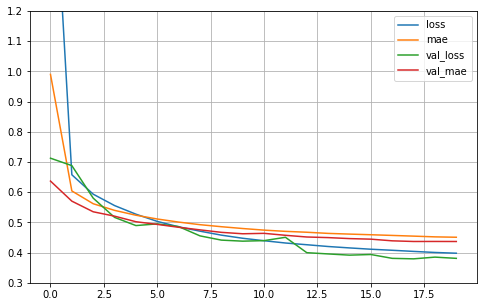

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.3,1.2)
plt.show()

In [ ]:
X_new = X_test[:3]

In [ ]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.5328767]
 [1.8915398]
 [3.404087 ]]
[0.477   0.458   5.00001]


# Functional API

In [ ]:
# Free Keras resources

#del model
#keras.backend.clear_session()

In [ ]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 30)           930         ['dense_6[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_7[0][0]']            

In [ ]:
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(lr=1e-3),
              metrics = ["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 3s 6ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/40
363/363 [==============================] - 2s 4ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/40
363/363 [==============================] - 1s 4ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/40
363/363 [==============================] - 2s 6ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/40
363/363 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3685 - mae: 0.4314


In [ ]:
#model_history.history

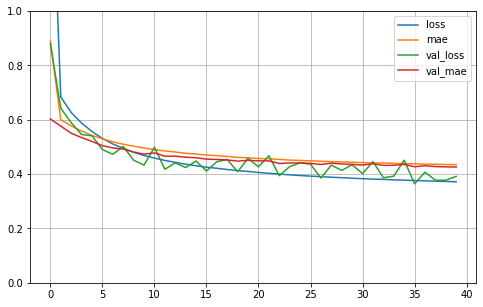

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

# Saving and restoring

In [ ]:
# give the model a name
model.save("my_Func_model.h5")

In [ ]:
%pwd

'/content'

In [ ]:
%cd \\content

[Errno 2] No such file or directory: '\\content'
/content


In [ ]:
del model

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("my_Func_model.h5")

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 30)           930         ['dense_6[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_7[0][0]']            

In [ ]:
y_pred = model.predict(X_new)
print(y_pred)

[[0.77771324]
 [1.7328484 ]
 [3.7573478 ]]


# Using callbacks during Training

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
              keras.layers.Dense(30, activation="relu", input_shape=[8]),
              keras.layers.Dense(30, activation="relu"),
              keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("/content/my_Func_model.h5")

In [ ]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3685 - mae: 0.4314


Best Model Only

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=[8]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4431 - val_loss: 0.4224

In [ ]:
model = keras.models.load_model("Best_Model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4366


Best Model Only, with early stopping

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=[8]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [ ]:
early_stoppig_cb = keras.callbakcs.EarlyStopping(patience = 10,
                                                 restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
model = keras.models.load_model("aearly_stop_model.h5")
mse_test = model.evalueate(X_test, y_test)

# Selecting hyperparameters

* Number of neurons per hidden layers are according to your data or problem (increasing the depth of the network has better results on the accuracy than increasing the number of naurons per layer).

*  Learning rate: To tune learning rate start with a large value, that makes algorithm diverge, then divide this value by 3 and try again.

* Batch size: should be < 32 and don't make it too small.

* Epochs: use early stopping

# convolutional Neural Networks

Concepts:

* Stride: Denotes how many steps we are mmoving in each steps in convolution. By default is one.

* Padding: Padding is a process of adding zeros to the input matrix symmetrically to mantain the dimesion of output as in input.

* Filter: values to multyply each section

* Feature map: Is the output of one filter applied to the previous layer.


Inputs:

# channels

* Red, green, and blue can be combined in various proportions to obtain any color in the visible spectrum.
* Each pixel of any colored image have its own RGB value that is responsible for the color of that pixel.
* For example, the following RGB value might be used to create purple:
  * R: 132 (84 hex)
  * G: 17 (11 hex)
  * R: 170 (AA hex)

# Pooling layer

Pooling layers goal is to subsample the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting)

1.- Max pooling: The maximum pixle value of batch is selected.
2.- Average pooling: The average value of all the pixels in the batch is selected.